<a href="https://colab.research.google.com/github/prashankkadam/Maer_1/blob/master/Boiler_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Adara_w_filter_har.xlsx to Adara_w_filter_har (3).xlsx


In [0]:
df1 = pd.read_excel(io.BytesIO(uploaded['Adara_w_filter_har.xlsx']))

In [55]:
uploaded = files.upload()

Saving Adara_w_filter_sea.xlsx to Adara_w_filter_sea (2).xlsx


In [0]:
df2 = pd.read_excel(io.BytesIO(uploaded['Adara_w_filter_sea.xlsx']))

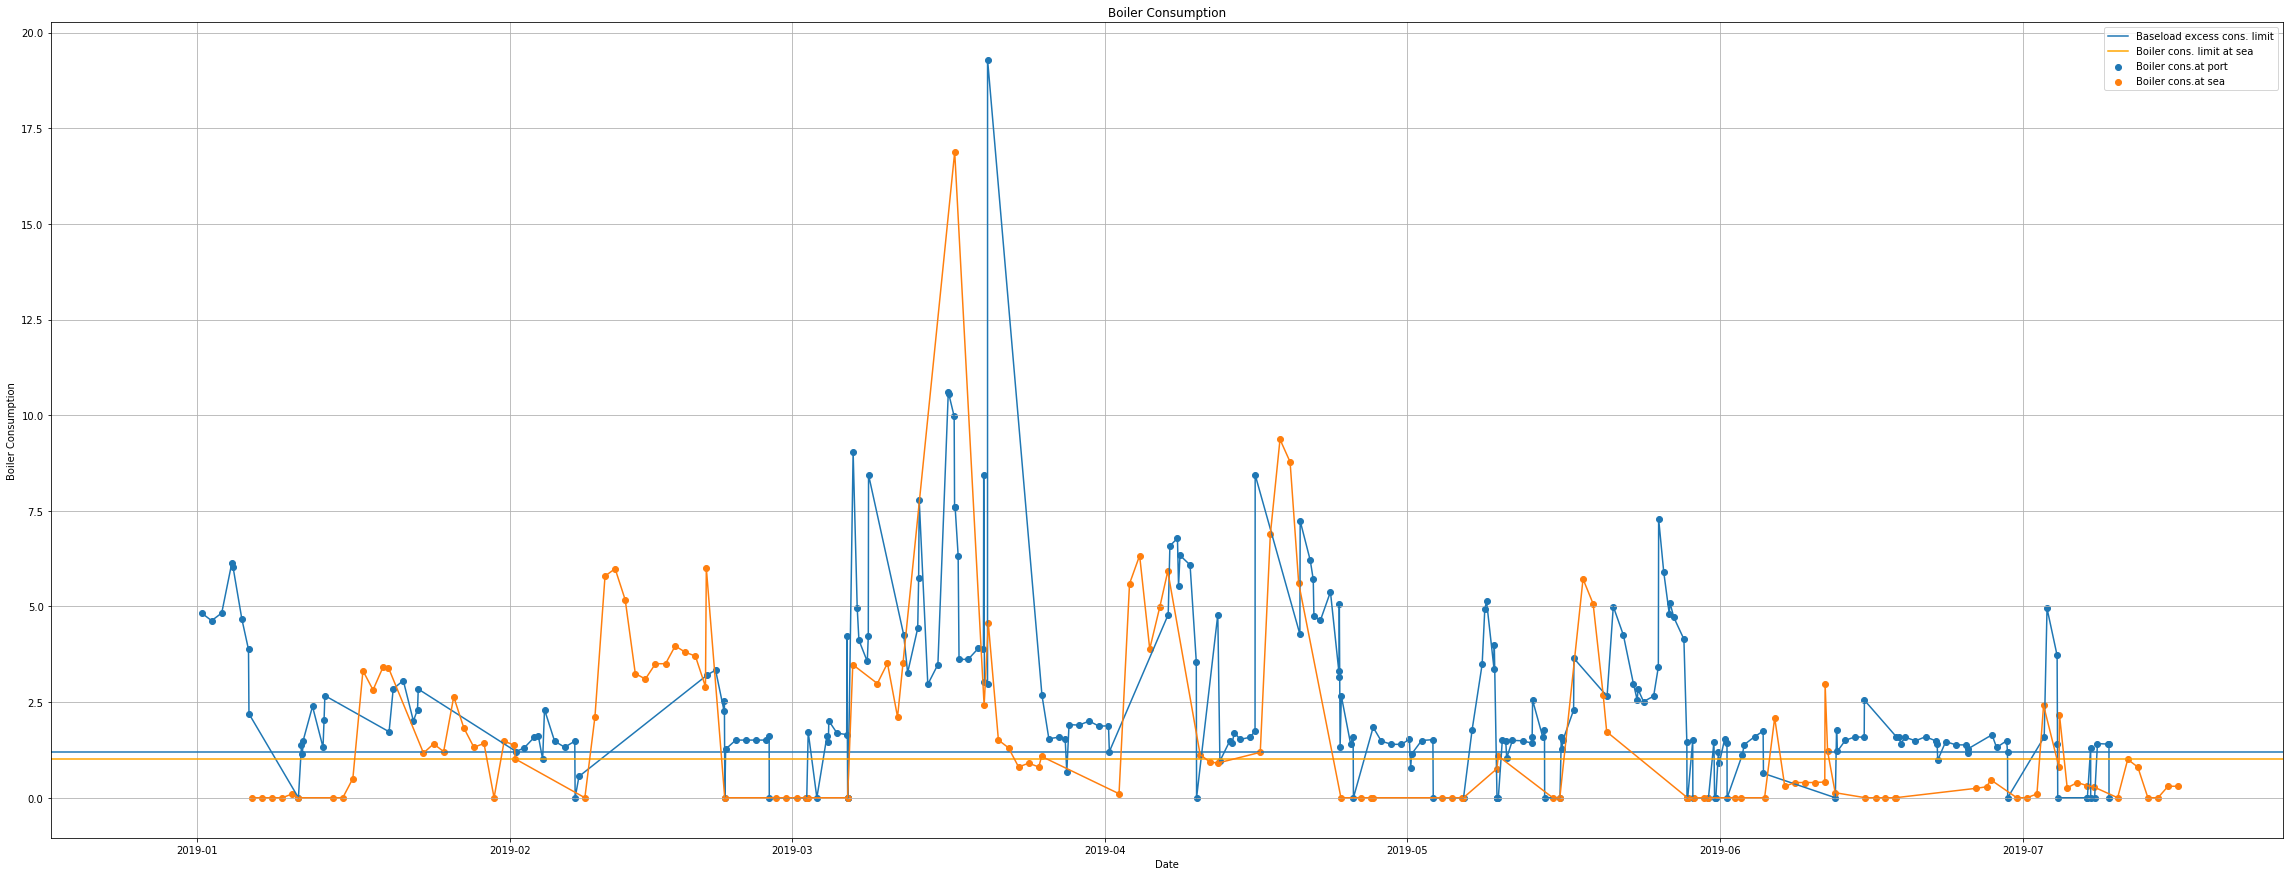

In [57]:
fig, ax = plt.subplots()
ax.scatter('Date', 'Boiler', data=df1, label='Boiler cons.at port')
ax.plot('Date','Boiler', data=df1, label='_nolegend_')
ax.axhline(y=1.2, label='Baseload excess cons. limit')
ax.axhline(y=1.0, color='orange', label='Boiler cons. limit at sea')
ax.scatter('Date', 'Boiler', data=df2, label='Boiler cons.at sea')
ax.plot('Date','Boiler', data=df2, label='_nolegend_')


plt.title('Boiler Consumption')
plt.xlabel('Date')
plt.ylabel('Boiler Consumption')
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (40,15)
plt.grid(b=True)

### **At Harbor**

In [0]:
total = len(df1.index)

In [103]:
x_nfil = df1['Boiler'][df1['Boiler'] >= 1.2].count()
print(total, x_fil)

241 190


In [0]:
per_nfil = ( x_nfil * 100  ) / total
per_fil = 100 - per_nfil

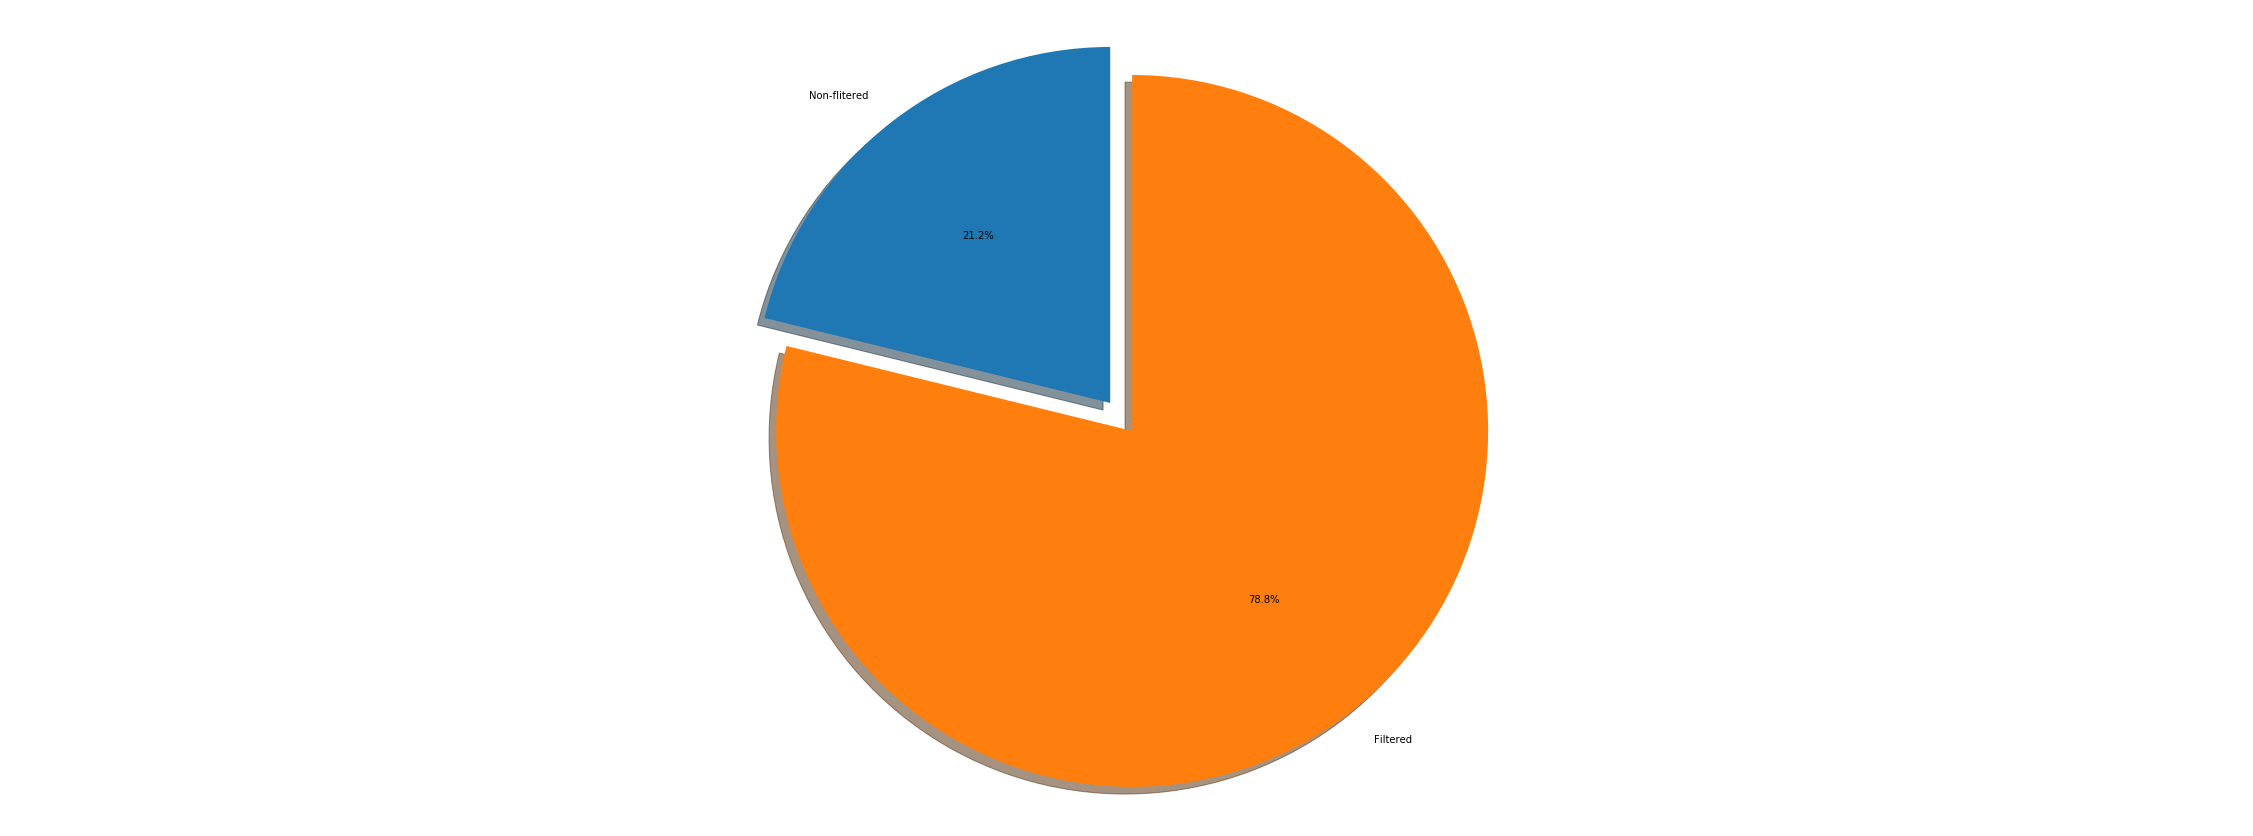

In [105]:
labels = 'Non-flitered', 'Filtered'
sizes = [per_fil, per_nfil]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### **At Sea**

In [0]:
total_s = len(df2.index)

In [95]:
print(total_s)

132


In [0]:
x_nfil_s = df2['Boiler'][df2['Boiler'] >= 1.0].count()

In [100]:
print(x_nfil_s)

60


In [0]:
per_nfil_s = ( x_nfil_s * 100  ) / total_s
per_fil_s = 100 - per_nfil_s

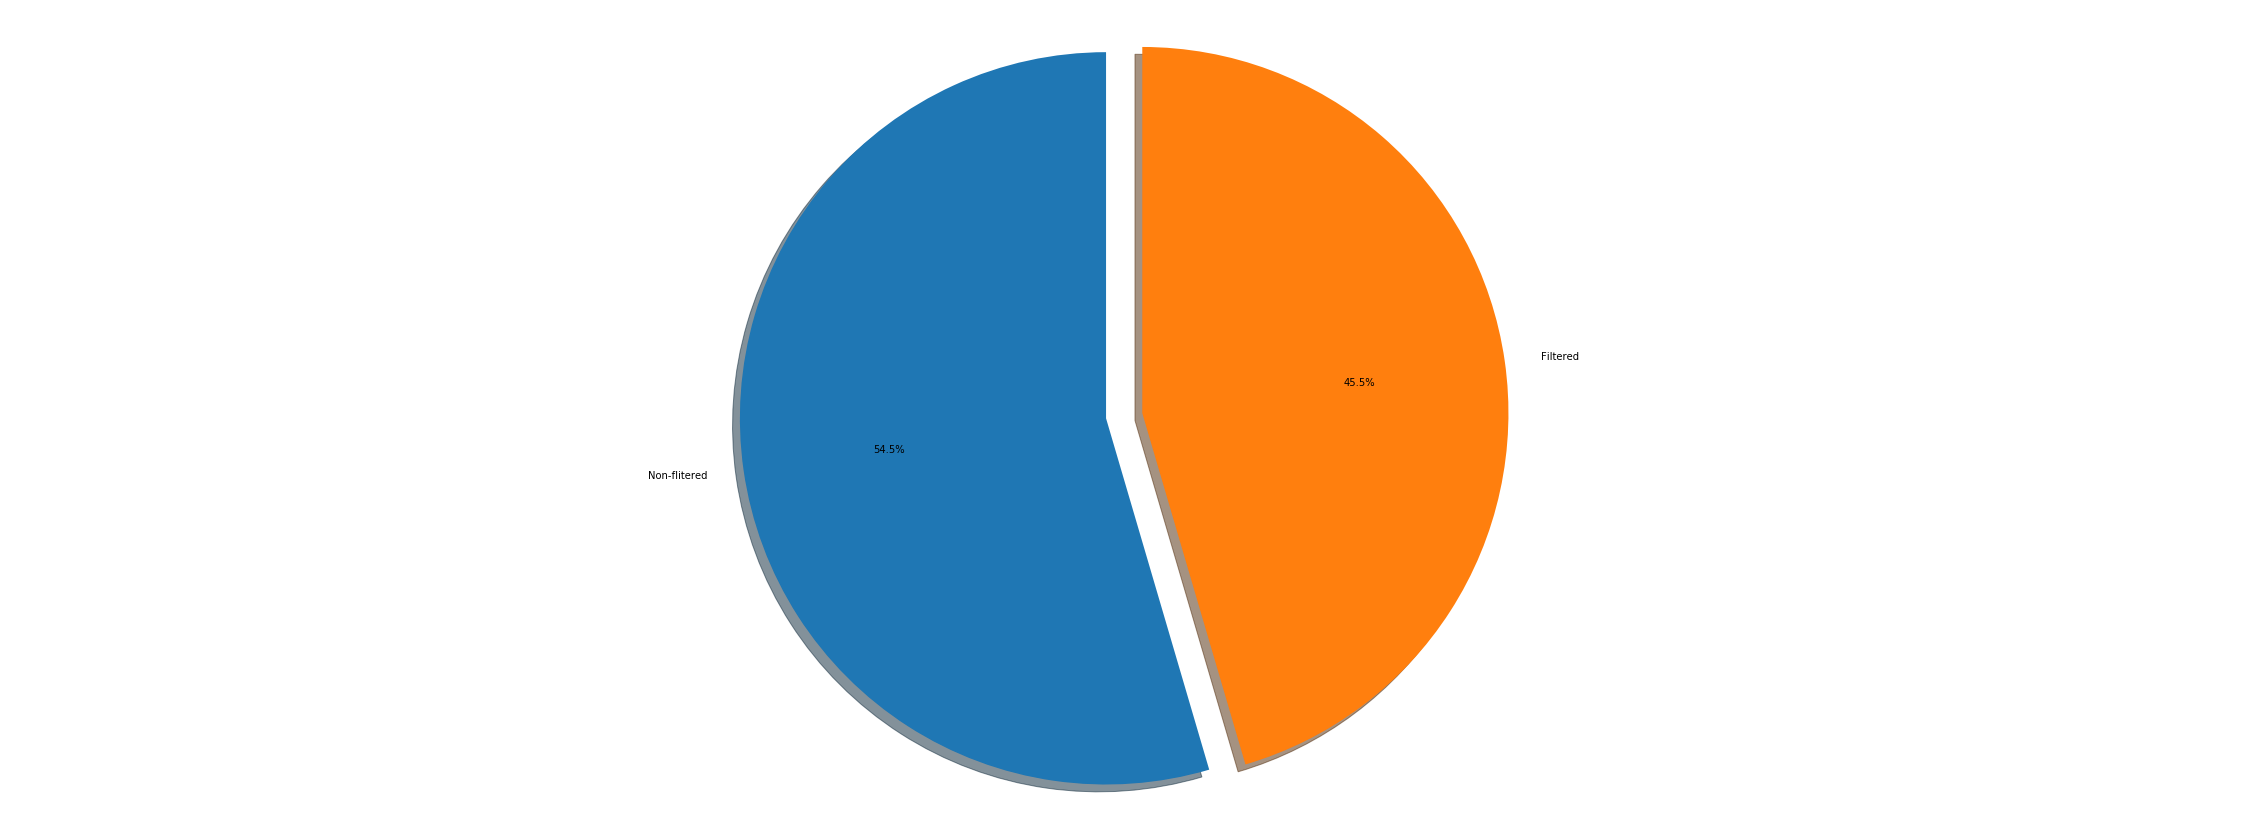

In [107]:
labels = 'Non-flitered', 'Filtered'
sizes = [per_fil_s, per_nfil_s]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [0]:
counter = 0
for index, row in df1.iterrows():
  if row['Boiler'] < 1.3:
    counter = counter + row['Boiler']

total_bus_imp = counter * 400 

In [112]:
print('Total Business impact at harbor: ' + str(total_bus_imp))

Total Business impact at harbor: 8772.95552031941


In [0]:
counter = 0
for index, row in df2.iterrows():
  if row['Boiler'] < 1.0:
    counter = counter + row['Boiler']

total_bus_imp = counter * 400 

In [116]:
print('Total Business impact at sea: ' + str(total_bus_imp))

Total Business impact at sea: 8999.291045481725
